In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Madhuri\Downloads\heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns = ['age','sex','chest pain type','resting blood pressure','serum cholestoral','fasting blood sugar','resting electrocardiographic results','maximum heart rate','exang','oldpeak','slope','ca','thal','target']
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df['target'].unique()

array([1, 0], dtype=int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   303 non-null    int64  
 1   sex                                   303 non-null    int64  
 2   chest pain type                       303 non-null    int64  
 3   resting blood pressure                303 non-null    int64  
 4   serum cholestoral                     303 non-null    int64  
 5   fasting blood sugar                   303 non-null    int64  
 6   resting electrocardiographic results  303 non-null    int64  
 7   maximum heart rate                    303 non-null    int64  
 8   exang                                 303 non-null    int64  
 9   oldpeak                               303 non-null    float64
 10  slope                                 303 non-null    int64  
 11  ca                 

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest pain type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting blood pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
serum cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting blood sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resting electrocardiographic results,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
maximum heart rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='target', ylabel='count'>

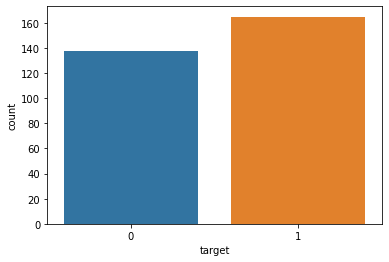

In [9]:
sns.countplot(x='target',data=df)

In [10]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'maximum heart rate', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

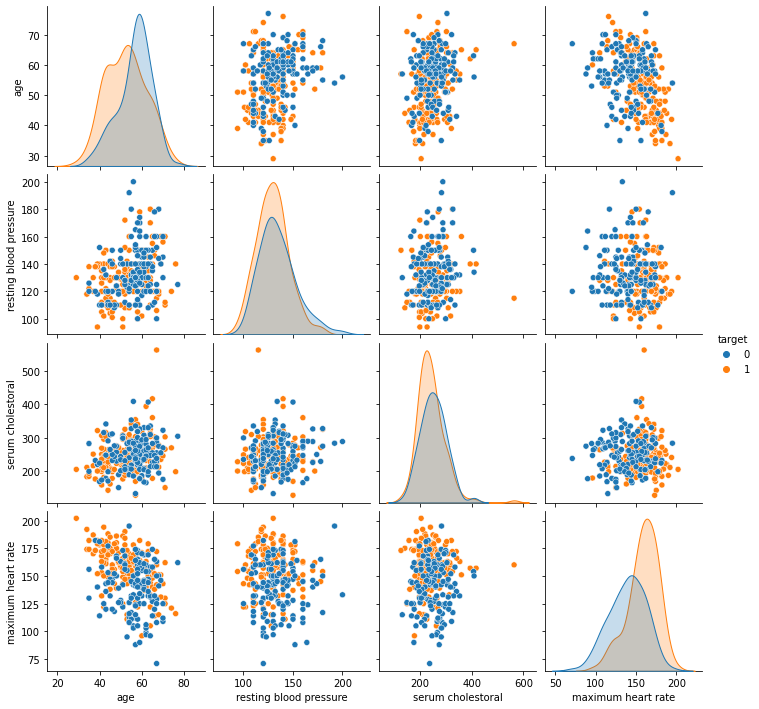

In [12]:
sns.pairplot(df[['age','resting blood pressure', 'serum cholestoral','maximum heart rate','target']],hue='target')

<AxesSubplot:>

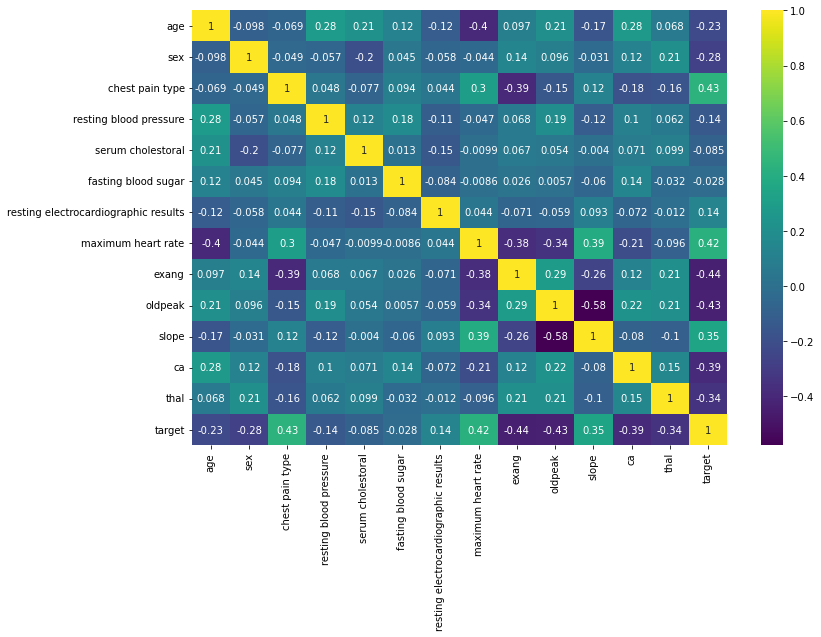

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [14]:
X = df.drop('target',axis=1)
y = df['target']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegressionCV 

In [20]:
log_model = LogisticRegressionCV()

In [21]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [22]:
log_model.C_

array([0.04641589])

In [23]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [24]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [25]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [26]:
coefs = coefs.sort_values()

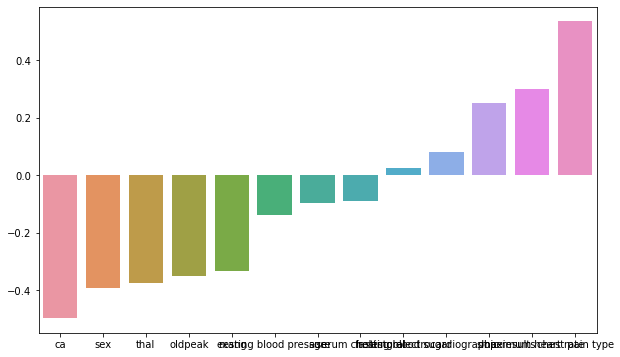

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

In [28]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

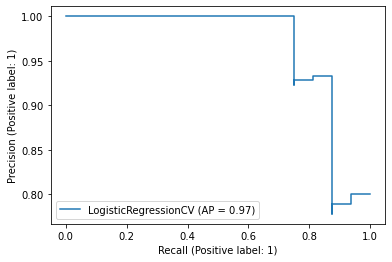

In [41]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

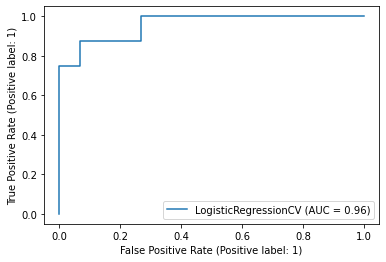

In [42]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [31]:
from joblib import dump, load

In [32]:
dump(log_model, 'heart disease_model.joblib') 

['heart disease_model.joblib']

In [33]:
loaded_model = load('heart disease_model.joblib')

In [34]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [35]:
loaded_model.predict(patient)

array([0], dtype=int64)

In [36]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])